In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-11-12 03:15:43.542537: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-12 03:15:44.332552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 160
dataset_take = 1000
learning_rate = 1.5e-3
batch_per_file_size = 8
node_embedding_size = 15
layers = [128, 64, 32, 64, 24]

dataset = LayoutDataset(
    batch_size, dataset_take,
    subset=None, build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

train layout:nlp:default 1000
train layout:nlp:random 1000
train layout:xla:random 3000
train layout:xla:default 3000
test all_filenames 10000
valid all_filenames 1000


2023-11-12 03:15:46.910059: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-12 03:15:47.016757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-12 03:15:47.017000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    batch_per_file_size=batch_per_file_size,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=5,
    layer_sizes=layers,
    loss='pairwise_hinge',
    n_siblings=dataset.n_siblings,
    l1_multiplier=2e-8,
    output_name='layout_none_11_12_03_15'
)

In [4]:
mlp.train(dataset, None)

2023-11-12 03:20:00.140560: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-11-12 03:20:00.186150: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd6984f8fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-12 03:20:00.186172: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-12 03:20:00.226651: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-12 03:20:00.469125: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-12 03:20:00.655357: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 3.4013557 lr 0.00007
iteration 1000 training loss 3.1646912 lr 0.00015
iteration 1500 training loss 2.673769 lr 0.00022
iteration 2000 training loss 2.3698173 lr 0.00030
iteration 2500 training loss 2.4903533 lr 0.00037
iteration 3000 training loss 2.5177321 lr 0.00045
iteration 3500 training loss 1.7034522 lr 0.00052
iteration 4000 training loss 1.8426639 lr 0.00060
iteration 4500 training loss 2.20379 lr 0.00067
iteration 5000 training loss 1.7902968 lr 0.00075
iteration 5500 training loss 1.6629847 lr 0.00082
iteration 6000 training loss 1.7940216 lr 0.00090
iteration 6500 training loss 2.0523393 lr 0.00097
iteration 7000 training loss 1.8783458 lr 0.00105
iteration 7500 training loss 1.2832676 lr 0.00112
iteration 8000 training loss 1.4861238 lr 0.00120
iteration 8500 training loss 1.3051887 lr 0.00127
iteration 9000 training loss 1.4513209 lr 0.00135
iteration 9500 training loss 1.9756627 lr 0.00142
iteration 10000 training loss 1.3883774 lr 0.00150
lay

iteration 70000 training loss 0.88689935 lr 0.00121
layout:nlp:random 0.9237359161399892
layout:nlp:default 0.49636770428675836
layout:xla:random 0.5805431672067879
layout:xla:default 0.3152492887975333
epoch 0, it 70000 validation loss -0.579
iteration 70500 training loss 1.1611166 lr 0.00120
iteration 71000 training loss 1.2947391 lr 0.00120
iteration 71500 training loss 1.3462954 lr 0.00119
iteration 72000 training loss 1.3865231 lr 0.00119
iteration 72500 training loss 1.2738261 lr 0.00118
iteration 73000 training loss 1.270027 lr 0.00118
iteration 73500 training loss 1.6328504 lr 0.00117
iteration 74000 training loss 1.2390856 lr 0.00117
iteration 74500 training loss 1.2255784 lr 0.00116
iteration 75000 training loss 1.2191676 lr 0.00116
iteration 75500 training loss 1.2119812 lr 0.00116
iteration 76000 training loss 0.8751387 lr 0.00115
iteration 76500 training loss 1.090599 lr 0.00115
iteration 77000 training loss 1.1897105 lr 0.00114
iteration 77500 training loss 1.345109 lr 0.

In [5]:
mlp.best_val_subsets

{'layout:nlp:random': 0.9237359161399892,
 'layout:nlp:default': 0.5022539194436331,
 'layout:xla:random': 0.6208309627407183,
 'layout:xla:default': 0.33721377005534636}

In [6]:
np.mean(list(mlp.best_val_subsets.values()))

0.5960086420949217

## Evaluate validation set

In [7]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

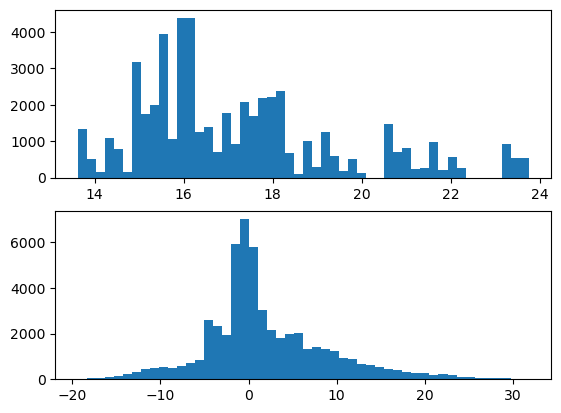

In [8]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [9]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

,ID,config_index,prediction,target
ID,,,,
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train',b'layout:nlp:random:small_bert_bert_en_uncased...,52,-19.381182,15.866922
b'layout:nlp:random:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train',b'layout:nlp:random:bert_multi_cased_L-12_H-76...,24,-18.604961,17.404556
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-768_A-12_batch_size_16_train',b'layout:nlp:random:small_bert_bert_en_uncased...,4,-18.392406,17.056398
b'layout:nlp:random:small_bert_bert_en_uncased_L-12_H-768_A-12_batch_size_64_train',b'layout:nlp:random:small_bert_bert_en_uncased...,4,-17.566475,18.142067
b'layout:nlp:random:small_bert_bert_en_uncased_L-6_H-768_A-12_batch_size_32_train',b'layout:nlp:random:small_bert_bert_en_uncased...,26,-17.356041,17.015827
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train',b'layout:nlp:random:small_bert_bert_en_uncased...,23,-16.689919,16.527550
b'layout:nlp:random:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train',b'layout:nlp:random:small_bert_bert_en_uncased...,168,-16.611168,15.196446
b'layout:xla:random:tf2_bert_pretrain_dynamic_batch_size',b'layout:xla:random:tf2_bert_pretrain_dynamic_...,5,-16.411919,17.944084
b'layout:nlp:random:small_bert_bert_en_uncased_L-4_H-512_A-8_batch_size_32_train',b'layout:nlp:random:small_bert_bert_en_uncased...,152,-15.892786,16.103596


Text(0.5, 1.0, "b'layout:xla:default:resnet50.4x4.fp16'")

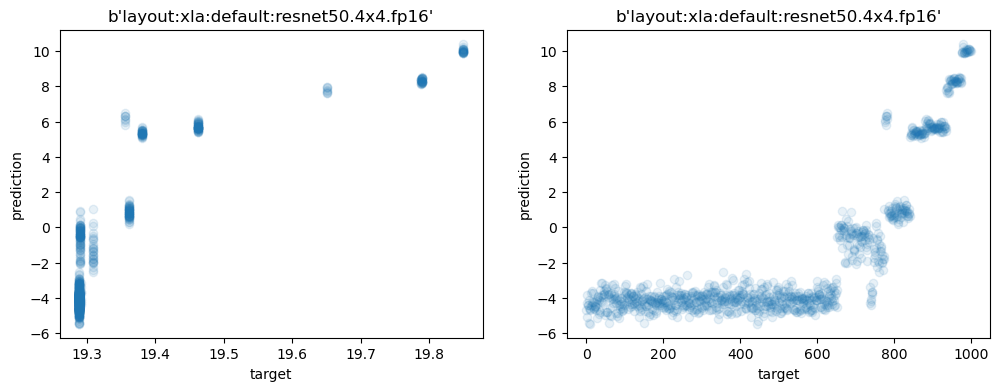

In [10]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1_000)
graph_id = np.random.choice(val_df['ID'].unique())
#graph_id = b'layout:xla:default:inception_v3_batch_128_train'
#graph_id = b'layout:xla:default:unet_3d.4x4.bf16'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

In [11]:
mlp.dense_layer_node_3.kernel.numpy().shape

(64, 32)

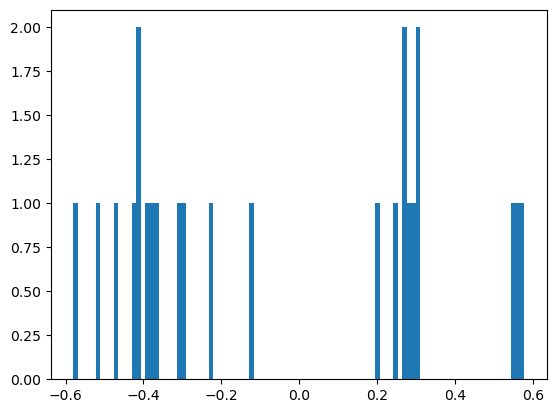

In [12]:
plt.hist(mlp.dense_layer_global_3.kernel.numpy().flatten(), bins=100);

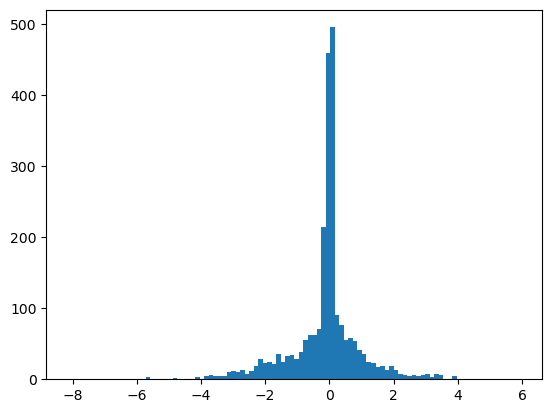

In [13]:
plt.hist(mlp.dense_layer_global_1.kernel.numpy()[:, 48:72].flatten(), bins=100);

In [14]:
(np.abs(mlp.dense_layer_global_1.kernel.numpy().flatten())>1.5).mean()

0.10927287581699346

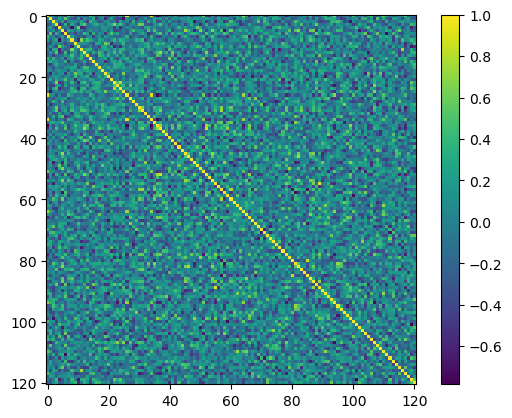

In [15]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [ ]:
ind = np.unravel_index(np.argsort(dots.flatten())[-122], dots.shape)
ind

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [ ]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

In [ ]:
val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

In [ ]:
val_df

In [ ]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

In [ ]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
all_means = []
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    all_means.append(mean)
    print(subset, mean)
print(np.mean(all_means))

In [ ]:
np.mean([
    0.9235,
    0.6591,
    0.516,
    0.358,
    0.968
])

In [ ]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

In [ ]:
valid_nodes_list = []
for batch in dataset.valid_data:
    df = pd.DataFrame(
        np.stack([
            batch['layout_id'].numpy(), 
            batch['valid_nodes'].numpy()], axis=-1),
        columns=['ID', 'valid_nodes']
    ).drop_duplicates('ID')
    valid_nodes_list.append(df)
valid_nodes = pd.concat(valid_nodes_list).drop_duplicates('ID')
valid_nodes

In [ ]:
valid_nodes.set_index('ID', inplace=True)
valid_nodes['scores'] = val_scores
valid_nodes

In [ ]:
valid_nodes.reset_index(inplace=True)
valid_nodes

In [ ]:
valid_nodes['subset'] = valid_nodes['ID'].apply(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
valid_nodes

In [ ]:
plt.scatter(
    valid_nodes['scores'],
    valid_nodes['valid_nodes']
)

In [ ]:
subset = 'layout:xla:random'
valid_nodes_subset = valid_nodes[valid_nodes['subset'] == subset]
print(valid_nodes_subset.sort_values('valid_nodes').iloc[-1])
plt.scatter(
    valid_nodes_subset['scores'],
    valid_nodes_subset['valid_nodes']
)

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [ ]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

In [ ]:
test_df.groupby('ID').count()

In [ ]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

In [ ]:
test_prediction = pd.DataFrame(test_prediction, columns=['TopConfigs']).reset_index()
test_prediction

In [ ]:
test_prediction['subset'] = test_prediction['ID'].apply(lambda x:':'.join(x.split(':')[:3]))

In [ ]:
subset = 'layout:xla:default'
test_prediction[test_prediction['subset'] == subset]

In [ ]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/layout_none_test_prediction_11_11_01_21.csv')